In [26]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import random_split
%matplotlib inline

In [27]:
# data_df = pd.read_pickle('data_df_2015-2020-18-endpoints-4-cols.pickle')
# games_df = pd.read_pickle('games_df_2015-2020.pickle')
data_df = pd.read_csv('18-endpoints-4-cols.csv', index_col=[0,1])
games_df = pd.read_csv('games_df_2015-2020.csv')
games_df.drop(columns='Unnamed: 0', inplace=True)

In [28]:
data_df.head(10)

opponent-points-per-game-col=2  \
2014-11-04 Atlanta                                100.5   
           Boston                                 109.0   
           Brooklyn                                98.7   
           Charlotte                               91.0   
           Chicago                                 99.7   
           Cleveland                              101.5   
           Dallas                                 105.0   
           Denver                                  97.0   
           Detroit                                 96.0   
           Golden State                            90.3   

                         opponent-points-per-game-col=3  \
2014-11-04 Atlanta                                100.5   
           Boston                                 109.0   
           Brooklyn                                98.7   
           Charlotte                               91.0   
           Chicago                                 99.7   
           Cleveland                              101.5   
           Dallas                                 106.3   
           Denver                                  97.0   
           Detroit                                 96.0   
           Golden State                            90.3   

                         opponent-points-per-game-col=5  \
2014-11-04 Atlanta                                 92.0   
           Boston                                 105.0   
           Brooklyn                                85.0   
           Charlotte                               88.5   
           Chicago                                114.0   
           Cleveland                               95.0   
           Dallas                                 107.5   
           Denver                                  94.5   
           Detroit                                102.0   
           Golden State                           104.0   

                         opponent-points-per-game-col=6  \
2014-11-04 Atlanta                                109.0   
           Boston                                 111.0   
           Brooklyn                               105.5   
           Charlotte                               96.0   
           Chicago                                 92.5   
           Cleveland                              108.0   
           Dallas                                 102.5   
           Denver                                 102.0   
           Detroit                                 93.0   
           Golden State                            83.5   

                         points-per-game-col=2  points-per-game-col=3  \
2014-11-04 Atlanta                       102.0                  102.0   
           Boston                        108.0                  108.0   
           Brooklyn                      107.7                  107.7   
           Charlotte                      90.0                   90.0   
           Chicago                       106.0                  106.0   
           Cleveland                     102.0                  102.0   
           Dallas                        111.8                  115.7   
           Denver                         95.0                   95.0   
           Detroit                        86.7                   86.7   
           Golden State                  105.7                  105.7   

                         points-per-game-col=5  points-per-game-col=6  \
2014-11-04 Atlanta                       102.0                  102.0   
           Boston                        121.0                  101.5   
           Brooklyn                      116.0                  103.5   
           Charlotte                      88.5                   93.0   
           Chicago                       108.0                  105.0   
           Cleveland                      90.0                  114.0   
           Dallas                        119.0                  104.5   
           Denver                    

In [29]:
t0 = time.time()
# Remove data_df values/rows if no game played by that team on day
data_df['Won'] = -1
# i = 0
for ind in data_df.index:
    if ((games_df['Date'] == ind[0]) & (games_df['Home'] == ind[1])).any():
        won = int(games_df.loc[(games_df['Date'] == ind[0]) & (games_df['Home'] == ind[1]), 'DidHomeWin'].item())
        data_df.loc[(ind[0], ind[1]), 'Won'] = won
    elif ((games_df['Date'] == ind[0]) & (games_df['Away'] == ind[1])).any():
        won = int(not games_df.loc[(games_df['Date'] == ind[0]) & (games_df['Away'] == ind[1]), 'DidHomeWin'].item())
        data_df.loc[(ind[0], ind[1]), 'Won'] = won
    else:
        # print('no game\n')
        data_df.drop((ind[0], ind[1]), axis='index', inplace=True)
    # i += 1
    # if (i > 9):
    #     break
t1 = time.time()
print(f"This took {round(t1-t0, 2)} seconds")

This took 627.67 seconds


In [40]:
# int(games_df.loc[(games_df['Date'] == '2014-11-01') & (games_df['Home'] == 'Charlotte'), 'DidHomeWin'].item())
data_df.to_csv('data_df_18_endpoints_4_cols_eda.csv')

In [36]:
# test_df = data_df.iloc[:100, :]
data_df.describe()

,opponent-points-per-game-col=2,opponent-points-per-game-col=3,opponent-points-per-game-col=5,opponent-points-per-game-col=6,points-per-game-col=2,points-per-game-col=3,points-per-game-col=5,points-per-game-col=6,true-shooting-percentage-col=2,true-shooting-percentage-col=3,...,defensive-rebounding-pct-col=6,offensive-rebounding-pct-col=2,offensive-rebounding-pct-col=3,offensive-rebounding-pct-col=5,offensive-rebounding-pct-col=6,win-pct-all-games-col=2,win-pct-all-games-col=3,win-pct-all-games-col=5,win-pct-all-games-col=6,Won
count,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,...,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000,10540.000000
mean,104.425664,105.086698,103.257030,105.636679,104.434099,105.083482,105.635342,103.218814,108.320683,108.958899,...,75.949051,23.556319,23.415987,24.074896,23.034080,0.500150,0.499824,0.575011,0.422477,0.500000
std,5.556055,8.508302,5.961339,6.069256,5.927309,8.738012,6.576833,6.220951,4.438748,7.693937,...,2.718035,2.765730,4.737818,3.224534,2.974916,0.172795,0.311194,0.201020,0.194582,0.500024
min,85.000000,75.000000,75.000000,72.000000,86.700000,74.700000,78.000000,81.000000,90.000000,82.400000,...,60.600000,13.500000,6.100000,8.300000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.300000,99.000000,98.800000,101.500000,100.700000,99.000000,101.500000,99.000000,105.700000,103.700000,...,74.300000,21.600000,20.100000,21.800000,21.100000,0.385000,0.333000,0.435000,0.286000,0.000000
50%,104.300000,105.000000,103.100000,105.500000,103.900000,104.700000,105.300000,102.900000,108.100000,108.800000,...,75.900000,23.500000,23.300000,24.000000,22.800000,0.500000,0.333000,0.600000,0.417000,0.500000
75%,108.100000,111.000000,107.100000,109.500000,108.100000,111.000000,109.800000,107.200000,111.200000,114.100000,...,77.800000,25.400000,26.500000,26.300000,24.800000,0.611000,0.667000,0.714000,0.540000,1.000000
max,123.900000,138.700000,129.000000,132.000000,125.000000,138.300000,127.000000,125.800000,126.800000,135.800000,...,91.700000,35.200000,42.000000,37.500000,45.200000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
data_df.corr()

,opponent-points-per-game-col=2,opponent-points-per-game-col=3,opponent-points-per-game-col=5,opponent-points-per-game-col=6,points-per-game-col=2,points-per-game-col=3,points-per-game-col=5,points-per-game-col=6,true-shooting-percentage-col=2,true-shooting-percentage-col=3,...,defensive-rebounding-pct-col=6,offensive-rebounding-pct-col=2,offensive-rebounding-pct-col=3,offensive-rebounding-pct-col=5,offensive-rebounding-pct-col=6,win-pct-all-games-col=2,win-pct-all-games-col=3,win-pct-all-games-col=5,win-pct-all-games-col=6,Won
opponent-points-per-game-col=2,1.000000,0.643315,0.919392,0.921066,0.583093,0.380139,0.536647,0.545852,0.247730,0.139886,...,-0.037895,-0.165285,-0.102629,-0.139564,-0.149668,-0.367578,-0.217064,-0.277528,-0.355995,-0.100026
opponent-points-per-game-col=3,0.643315,1.000000,0.578670,0.600424,0.387385,0.469772,0.349894,0.367081,0.166038,0.181277,...,-0.001968,-0.092384,-0.067735,-0.078813,-0.084908,-0.221524,-0.414852,-0.160624,-0.216994,-0.070208
opponent-points-per-game-col=5,0.919392,0.578670,1.000000,0.706948,0.525030,0.343429,0.539375,0.435332,0.226689,0.130995,...,0.002500,-0.177609,-0.105464,-0.148959,-0.158565,-0.345425,-0.189536,-0.350327,-0.253577,-0.085633
opponent-points-per-game-col=6,0.921066,0.600424,0.706948,1.000000,0.551801,0.357560,0.454712,0.576594,0.231813,0.129329,...,-0.073130,-0.131129,-0.084435,-0.110675,-0.123638,-0.326989,-0.206003,-0.169231,-0.405637,-0.096737
points-per-game-col=2,0.583093,0.387385,0.525030,0.551801,1.000000,0.664856,0.930281,0.919825,0.800244,0.460181,...,0.106348,-0.021473,-0.038228,0.019068,-0.058334,0.481213,0.249064,0.472821,0.364693,0.123651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
win-pct-all-games-col=2,-0.367578,-0.221524,-0.345425,-0.326989,0.481213,0.331562,0.441699,0.443833,0.623524,0.361096,...,0.143268,0.100647,0.042790,0.128382,0.042036,1.000000,0.550190,0.870325,0.864356,0.237557
win-pct-all-games-col=3,-0.217064,-0.414852,-0.189536,-0.206003,0.249064,0.445477,0.239360,0.217938,0.338061,0.505384,...,0.088228,0.058876,0.103281,0.070462,0.029941,0.550190,1.000000,0.474073,0.474434,0.130192
win-pct-all-games-col=5,-0.277528,-0.160624,-0.350327,-0.169231,0.472821,0.323680,0.505139,0.366010,0.565679,0.324410,...,0.140200,0.100835,0.042059,0.145854,0.020756,0.870325,0.474073,1.000000,0.526633,0.208189
win-pct-all-games-col=6,-0.355995,-0.216994,-0.253577,-0.405637,0.364693,0.251119,0.267432,0.415500,0.520123,0.300647,...,0.098917,0.075873,0.031657,0.076108,0.061426,0.864356,0.474434,0.526633,1.000000,0.203852


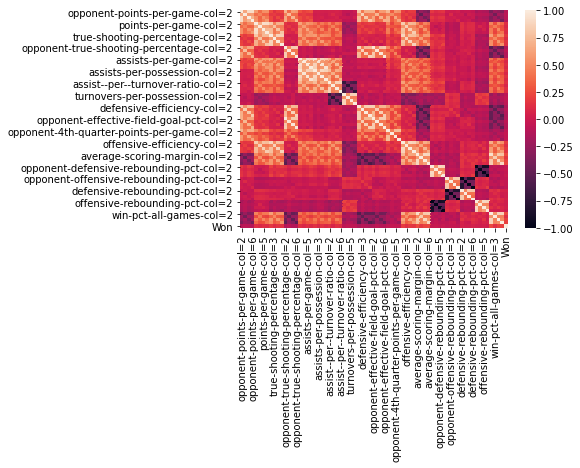

In [38]:
sns.heatmap(data_df.corr())